----------
Yuqoridagi jadvalda MohirDev MChJ tomonidan turli OAV larda (TV, Radio, Newspaper) berilgan reklamalar soni va mos keluvchi savdolar (Sales) berilgan.

Sizning vazifangiz:

    Aynan qaysi turdagi OAVda reklama berish savdo o'sishiga ta'sir qiladi aniqlash
    Topilgan bog'liqlik asosida Simple Linear Regression algorithmi yordamida bashorat modelini qurish.
    Ushbu amaliyotda sizning vazifangiz berilgan dataset yordamida Simple Linear Regression model yaratish:

        CRISP-DM metodologiyasiga amal qiling!
        Simple linear regression qo'llash uchun 1 ta ustunni tanlab oling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


-------------
1. Bizga eng qulay ustunlar Tv va Sales ustunlari bo'ldi, biz undan SLR modelini tayyorlaymiz

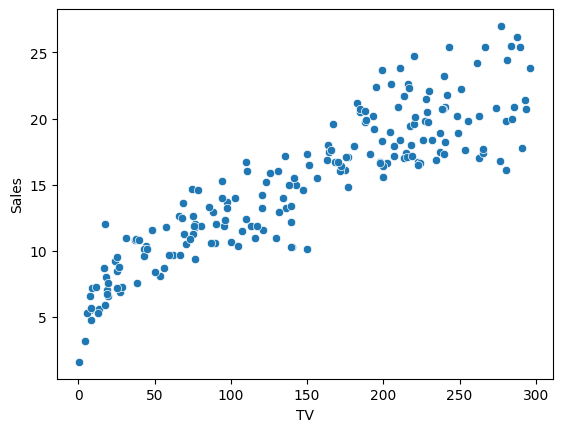

In [13]:
sns.scatterplot(data=df, x="TV", y="Sales")
plt.show()

------------
2. SLR modelini tayyorlaymiz

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.10, random_state=42)

In [15]:
# modelni yaratish
from sklearn import linear_model
SLR_model = linear_model.LinearRegression()

# df jadvalidan bizga kerakli ustunlarni TV va Sales ustunlarini x va y qiymatlarigan numpy ko'rinishida saqlaymiz
x_train = np.asanyarray(train_set[["TV"]])
y_train = np.asanyarray(train_set[["Sales"]])

In [18]:
SLR_model.fit(x_train, y_train)

LinearRegression()

In [19]:
T1 = SLR_model.coef_[0][0]
T0 = SLR_model.intercept_[0]
print(f"T1 = {T1}")
print(f"T0 = {T0}")

T1 = 0.05513263076693964
T0 = 7.044916461655207


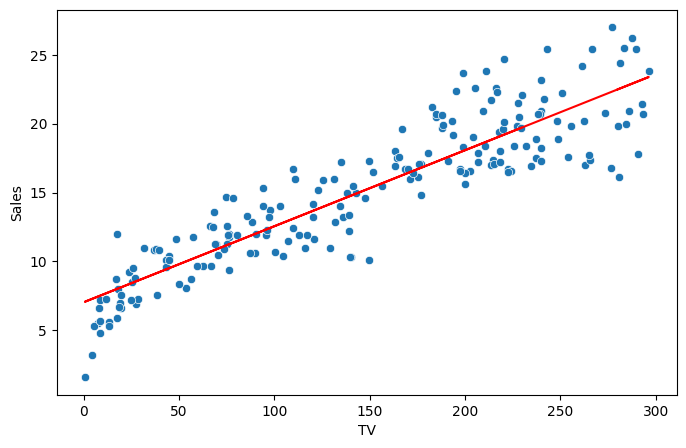

In [28]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="TV", y="Sales")
plt.plot(x_train, T0 + T1 * x_train, "-r")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [29]:
x_test = np.asanyarray(test_set[["TV"]])
y_test = np.asanyarray(test_set[["Sales"]])

# Salesni bashorat qilish
y_predict = SLR_model.predict(x_test)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE= mean_squared_error(y_test, y_predict)
# MAE va RMSE larni chiqarish
print(f"{MAE = }")
print(f"{RMSE = }")

MAE = 2.037955356968121
RMSE = 6.302018984115436
